In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('Salaries.csv')

In [4]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


#### here our data set has campany, job, degree and salary more than 100k are features
### We have to predict whcich employee get salarary more than 100k or not

In [5]:
df.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [6]:
df.company.unique(),df.company.nunique()

(array(['google', 'abc pharma', 'facebook'], dtype=object), 3)

#### Here we have 3 companies google,abc pharma ,facebook

In [8]:
df.job.unique(),df.job.nunique()

(array(['sales executive', 'business manager', 'computer programmer'],
       dtype=object),
 3)

#### We have 3 types of jobs 'sales executive', 'business manager', 'computer programmer'

In [9]:
df.degree.unique(),df.nunique()

(array(['bachelors', 'masters'], dtype=object),
 company                  3
 job                      3
 degree                   2
 salary_more_then_100k    2
 dtype: int64)

#### we have employee of haaving degrees bachelors,masters

In [10]:
df['salary_more_then_100k'].unique()

array([0, 1], dtype=int64)

#### Here we have to predict employee having salary more than 100k or not

#### we have to convert data into numeric so we can use macine learning model 

#### As data is categorical we will use decision tree model, so we use label encoding

<AxesSubplot:xlabel='salary_more_then_100k'>

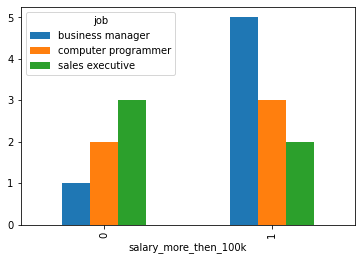

In [15]:
pd.crosstab(df.salary_more_then_100k,df.job).plot(kind = 'bar')

<AxesSubplot:xlabel='salary_more_then_100k'>

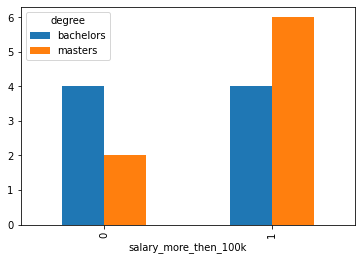

In [14]:
pd.crosstab(df.salary_more_then_100k,df.degree).plot(kind = 'bar')

<AxesSubplot:xlabel='salary_more_then_100k'>

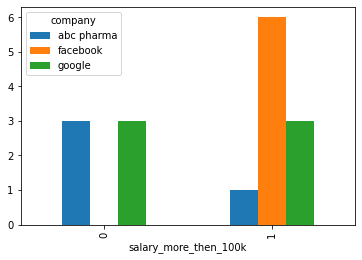

In [16]:
pd.crosstab(df.salary_more_then_100k,df.company).plot(kind = 'bar')

#### so from bar chart we have some idea like which company, job title and degree have salray more than 100k or not

#### let we do label encoding

#### here we have 3 feature have categorical data 

In [18]:
le = LabelEncoder()

In [19]:
df.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [20]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [21]:
df['company_n'] = le_company.fit_transform(df.company)
df['job_n'] = le_job.fit_transform(df.job)
df['degree_n'] = le_degree.fit_transform(df.degree)

In [23]:
df.head()

,company,job,degree,salary_more_then_100k,company_n,job_n,degree_n
0,google,sales executive,bachelors,0,2,2,0
1,google,sales executive,masters,0,2,2,1
2,google,business manager,bachelors,1,2,0,0
3,google,business manager,masters,1,2,0,1
4,google,computer programmer,bachelors,0,2,1,0


#### we can drop non numeric data

In [24]:
df = df.drop(['company', 'job', 'degree'],axis=1)

In [26]:
df.head()

,salary_more_then_100k,company_n,job_n,degree_n
0,0,2,2,0
1,0,2,2,1
2,1,2,0,0
3,1,2,0,1
4,0,2,1,0


In [28]:
X = df.drop(['salary_more_then_100k'],axis=1)

In [30]:
y = df.salary_more_then_100k

### Let we use Decision tree model

In [35]:
dt = DecisionTreeClassifier()

In [38]:
dt.fit(X,y)

DecisionTreeClassifier()

In [39]:
dt.score(X,y)

1.0

### its good our model is 100% accurate